Q1. Approach to Predicting Car Price

Step 1: Load the Data and Initial Exploration


1.1 Import Libraries & Load Data

In [2]:
import pandas as pd
import numpy as np

# Load data (update file path as necessary)
file_path = "/Users/prakratigupta/Library/CloudStorage/OneDrive-Personal/pdata/OJ Assessment/Car_Assignment 2 (2).xlsx"   # update path if needed

df1 = pd.read_excel(file_path, sheet_name="Car_Assignment1")

# Quick look at dataset
print(df1.head())
print(df1.info())
print(df1.describe())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front        NaN  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \

1.2 Explore the Dataset
	•	Check for missing values
	•	Understand the categorical and numerical columns

In [4]:
# Missing values
print(df1.isnull().sum())

# Unique values in each column
for col in df1.columns:
    print(col, df1[col].nunique(), df1[col].dtype)


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           5
carlength           5
carwidth            5
carheight           5
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Successful_Model    0
dtype: int64
car_ID 205 int64
symboling 6 int64
CarName 147 object
fueltype 2 object
aspiration 2 object
doornumber 2 object
carbody 5 object
drivewheel 3 object
enginelocation 2 object
wheelbase 51 float64
carlength 74 float64
carwidth 43 float64
carheight 49 float64
curbweight 171 int64
enginetype 7 object
cylindernumber 7 object
enginesize 44 int64
fuelsystem 8 object
boreratio 38 float64
stroke 37 f

Step 2: Data Cleaning & Preprocessing

2.1 Handle Missing Values

In [5]:
# Strip whitespace in object columns
for c in df1.select_dtypes(include="object"):
    df1[c] = df1[c].str.strip()

# Missing value check
print(df1.isna().sum().sort_values(ascending=False))

# Optional: remove obvious duplicates if any
df1 = df1.drop_duplicates()

df1_clean = df1.dropna()

wheelbase           5
carlength           5
carwidth            5
carheight           5
symboling           0
CarName             0
aspiration          0
carbody             0
doornumber          0
fueltype            0
car_ID              0
drivewheel          0
enginelocation      0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Successful_Model    0
dtype: int64


2.2 Encode Categorical Variables

In [7]:
categorical_cols = df1_clean.select_dtypes(include='object').columns
df1_encoded = pd.get_dummies(df1_clean, columns=categorical_cols, drop_first=True)


2.3 Feature Selection
	•	Remove ID columns or irrelevant fields as needed.

In [9]:
X = df1_encoded.drop(['price', 'car_ID'], axis=1)
y = df1_encoded['price']


Step 3 / Step 4: Model Selection / Train-Test Split & Model Evaluation

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


RMSE: 10440.013168198717
R2 Score: 0.13466345402208846


Q2. Binary Classification Model for Car Success

Step 1: Define Target and Explore Data

	•	The variable `Successful_Model` is my binary target (1 = Successful, 0 = Not Successful).

1.1 Define Features and Target

In [ ]:
# Ensure data from previous step is cleaned and encoded (df_encoded)
X = df1_encoded.drop(['car_ID', 'Successful_Model', 'price'], axis=1)  # Drop ID, target, and regression target
y = df1_encoded['Successful_Model']




1.2 Quick Look at Class Balance

In [12]:
print(y.value_counts())


Successful_Model
0    106
1     94
Name: count, dtype: int64


Step 2: Data Split and Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features for methods sensitive to scale (e.g., SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 3: Build and Compare Classification Models

3.1 Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr_clf = LogisticRegression(max_iter=500)
lr_clf.fit(X_train_scaled, y_train)
y_pred_lr = lr_clf.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr_clf.predict_proba(X_test_scaled)[:,1]))


[[13  8]
 [11  8]]
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        21
           1       0.50      0.42      0.46        19

    accuracy                           0.53        40
   macro avg       0.52      0.52      0.52        40
weighted avg       0.52      0.53      0.52        40

ROC-AUC: 0.5300751879699248


3.2 Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]))



[[18  3]
 [10  9]]
              precision    recall  f1-score   support

           0       0.64      0.86      0.73        21
           1       0.75      0.47      0.58        19

    accuracy                           0.68        40
   macro avg       0.70      0.67      0.66        40
weighted avg       0.69      0.68      0.66        40

ROC-AUC: 0.6416040100250626


3.3 Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, svm_clf.predict_proba(X_test_scaled)[:,1]))


[[14  7]
 [14  5]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        21
           1       0.42      0.26      0.32        19

    accuracy                           0.47        40
   macro avg       0.46      0.46      0.45        40
weighted avg       0.46      0.47      0.45        40

ROC-AUC: 0.4448621553884712


Step 4: Feature Importance
	•	For Random Forest or Logistic Regression, we can get feature importances.

In [17]:
# Random Forest Feature Importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

print("Feature ranking:")
for f in range(10):
    print(f"{f+1}. {feature_names[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. curbweight (0.07479012805369198)
2. carlength (0.056867794566508756)
3. carheight (0.05639869587227688)
4. wheelbase (0.0435814612652374)
5. citympg (0.04298299296571316)
6. highwaympg (0.04172112094796589)
7. stroke (0.04111563049792911)
8. carwidth (0.040360497555334544)
9. peakrpm (0.03844521487437407)
10. compressionratio (0.0363567877965089)


Q3. Car Segmentation with Clustering

Step 1: Select Features for Clustering

We will use variables like `enginesize`, `price`, `fueltype`, and sales performance. 

In [31]:
# Select relevant columns for clustering
features = ['enginesize', 'price', 'fueltype_gas', 'Successful_Model']
# fueltype should be converted to dummies in preprocessing if not already
X_cluster = df1_encoded[features]


Step 2: Standardize Features

Clustering is sensitive to scale; we must scale/normalize our data.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


Step 3 & Step 4: Choose Clustering Algorithm and Determine Optimal Number of Clusters

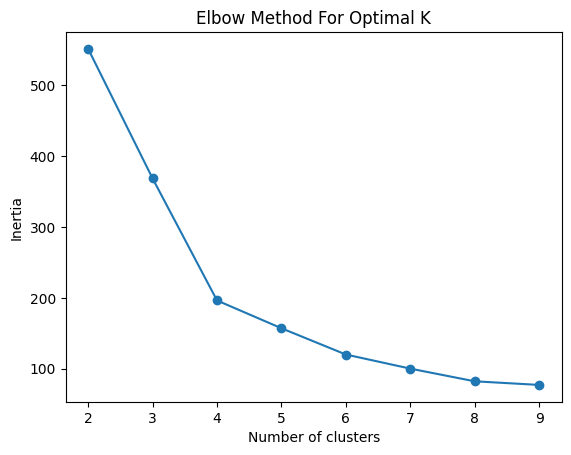

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


Step 5: Perform Clustering

In [24]:
optimal_k = 3  # for example, depending on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df1_encoded['Cluster'] = cluster_labels


Step 6: Analyze and Interpret Clusters

In [36]:
# Make sure df_encoded or the dataframe with dummy columns is used
df1_encoded['Cluster'] = cluster_labels

# Now groupby using the same df_encoded used for clustering
print(df1_encoded.groupby('Cluster')[features].mean())



         enginesize         price  fueltype_gas  Successful_Model
Cluster                                                          
0        118.969388  11399.551020      0.887755          0.000000
1        221.631579  33651.868421      0.736842          0.578947
2        114.951807  10839.351410      0.951807          1.000000


Q4. Sales Forecasting 

Step 1: Load and Prepare the Data

In [ ]:

file_path = "/Users/prakratigupta/Library/CloudStorage/OneDrive-Personal/pdata/OJ Assessment/Car_Assignment 2 (2).xlsx" 


# Load the sales data sheet
df_sales = pd.read_excel(file_path, sheet_name="Car_Assignment2")


# Convert 'Date' column to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Sort data by Date
df_sales = df_sales.sort_values('Date')

print(df_sales.head())


    Car_Name  Sales       Date  Price
563     Tata     10 2023-10-02   5585
561     Tata     10 2023-10-03   5862
560     Audi     10 2023-10-03   6343
559     Tata     10 2023-10-03   6365
562     Tata     13 2023-10-03   5677


Step 2: Aggregate Weekly Sales Data (for forecasting)

In [39]:
# Set Date as index
df_sales.set_index('Date', inplace=True)

# Group sales by week for each Car Name
weekly_sales = df_sales.groupby(['Car_Name']).resample('W').sum()['Sales'].reset_index()

print(weekly_sales.head())


  Car_Name       Date  Sales
0     Audi 2023-10-08     32
1     Audi 2023-10-15    101
2     Audi 2023-10-22    101
3     Audi 2023-10-29     47
4     Audi 2023-11-05     46


Step 3 / Step 4: Choose Forecasting Models / Forecast Sales for Each Car 

Importing plotly failed. Interactive plots will not work.
19:39:17 - cmdstanpy - INFO - Chain [1] start processing
19:39:18 - cmdstanpy - INFO - Chain [1] done processing


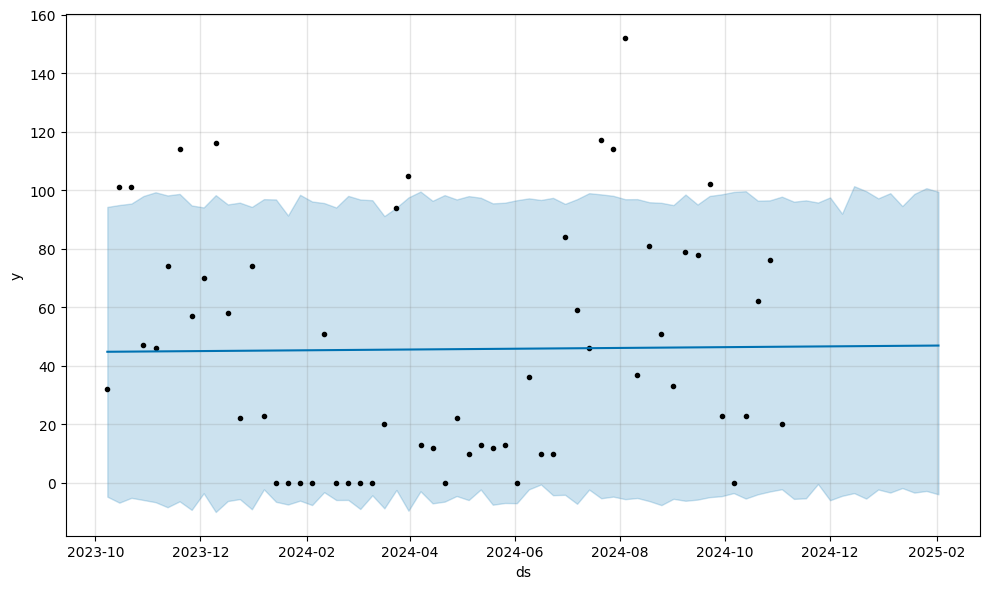

In [40]:
from prophet import Prophet

# Filter for one car brand to demonstrate (e.g., 'Audi')
audi_sales = weekly_sales[weekly_sales['Car_Name'] == 'Audi']

# Prepare data as Prophet expects
prophet_df = audi_sales.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Initialize and fit model
model = Prophet(weekly_seasonality=True)
model.fit(prophet_df)

# Create future dataframe for next quarter (13 weeks roughly)
future = model.make_future_dataframe(periods=13, freq='W')

# Forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)


In [41]:
#Define forecasting function for all car brands
def forecast_next_quarter_sales(df, brand_col='Car_Name', date_col='Date', sales_col='Sales'):
    forecast_results = {}
    brands = df[brand_col].unique()
    
    for brand in brands:
        brand_df = df[df[brand_col] == brand][[date_col, sales_col]]
        brand_df = brand_df.rename(columns={date_col: 'ds', sales_col: 'y'})
        
        model = Prophet(weekly_seasonality=True)
        model.fit(brand_df)
        
        future = model.make_future_dataframe(periods=13, freq='W')
        forecast = model.predict(future)
        
        # Filter predicted sales for the next quarter only
        last_date = brand_df['ds'].max()
        next_quarter_forecast = forecast[forecast['ds'] > last_date]
        
        # Sum the forecasted sales values ('yhat')
        total_forecast_sales = next_quarter_forecast['yhat'].sum()
        
        forecast_results[brand] = total_forecast_sales
    
    return pd.DataFrame(list(forecast_results.items()), columns=[brand_col, 'Forecasted_Sales_Next_Quarter'])





In [42]:

#Apply the function on weekly_sales data
forecast_df = forecast_next_quarter_sales(weekly_sales)

# Display forecast summary for all car brands
print(forecast_df)

19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:01 - cmdstanpy - INFO - Chain [1] done processing
19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:02 - cmdstanpy - INFO - Chain [1] done processing
19:49:02 - cmdstanpy - INFO - Chain [1] start processing
19:49:02 - cmdstanpy - INFO - Chain [1] done processing


  Car_Name  Forecasted_Sales_Next_Quarter
0     Audi                     607.275325
1      BMW                     401.010441
2     Tata                    -185.525530


Q5. Relationship between Price, Ad Spend, and Sales 

Step 1: Load and Inspect the Data

In [43]:
# Load the third sheet
df3 = pd.read_excel("/Users/prakratigupta/Library/CloudStorage/OneDrive-Personal/pdata/OJ Assessment/Car_Assignment 2 (2).xlsx", sheet_name="Car_Assignment3")

# Quick look at the data
print(df3.head())
print(df3.info())

   Car_Id  Sales  Month  Price  Ad Spend
0       1     26      1  53162        14
1       2     13      1  50117        23
2       3     11      1  51591        24
3       4     10      1  54975        25
4       5     12      1  50103        25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Car_Id    243 non-null    int64
 1   Sales     243 non-null    int64
 2   Month     243 non-null    int64
 3   Price     243 non-null    int64
 4   Ad Spend  243 non-null    int64
dtypes: int64(5)
memory usage: 9.6 KB
None


Step 2: Exploratory Data Analysis & Visualization

	•	Check for missing values
	•	Understand correlations visually and numerically
	•	Plot scatter plots to see relationships between Price, Ad Spend, and Sales

Car_Id      0
Sales       0
Month       0
Price       0
Ad Spend    0
dtype: int64
             Price  Ad Spend     Sales
Price     1.000000  0.059285 -0.018686
Ad Spend  0.059285  1.000000  0.057104
Sales    -0.018686  0.057104  1.000000


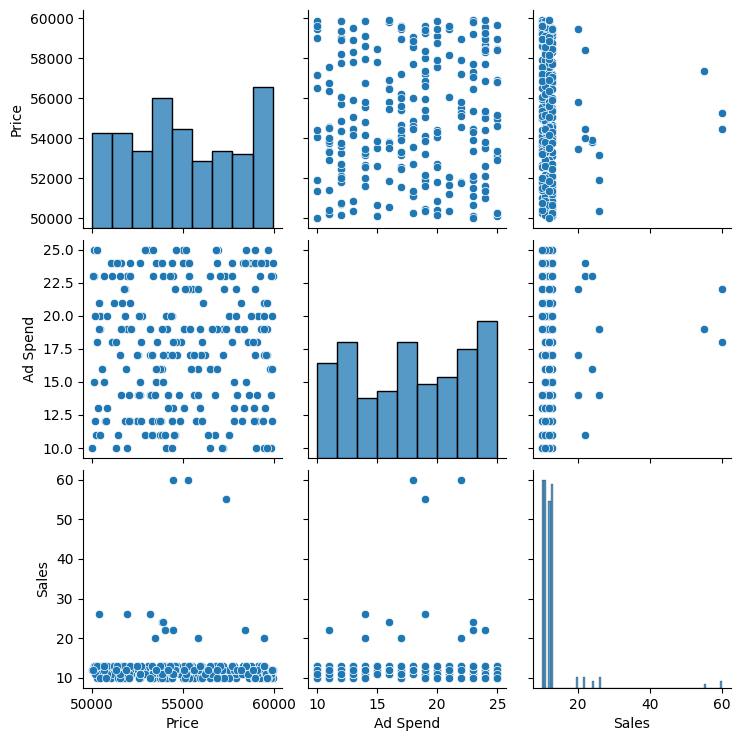

In [46]:
import seaborn as sns
# Check missing values
print(df3.isnull().sum())

# Correlation matrix
corr_matrix = df3[['Price', 'Ad Spend', 'Sales']].corr()
print(corr_matrix)

# Pairplot visualizing relationships
sns.pairplot(df3[['Price', 'Ad Spend', 'Sales']])
plt.show()

Step 3: Fit Multiple Linear Regression Model: Sales ~ Price + Ad Spend

In [47]:
import statsmodels.api as sm

X = df3[['Price', 'Ad Spend']]
y = df3['Sales']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Summarize results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4517
Date:                Tue, 19 Aug 2025   Prob (F-statistic):              0.637
Time:                        19:52:56   Log-Likelihood:                -770.35
No. Observations:                 243   AIC:                             1547.
Df Residuals:                     240   BIC:                             1557.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6718      6.963      1.964      0.0

Step 4: Interpret Model Results

	•	Coefficients tell how Sales change with Price and Ad Spend
	•	P-values show statistical significance of each predictor
	•	R-squared measures model fit quality

Step 5: Optional – Diagnostics & Visualization

	•	Plot predicted vs actual sales
	•	Residual plots to check assumptions

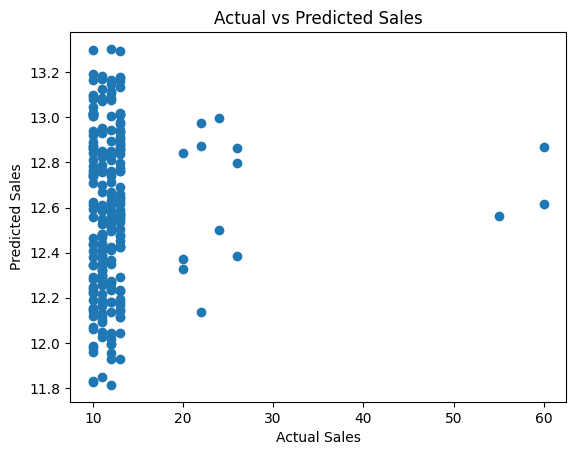

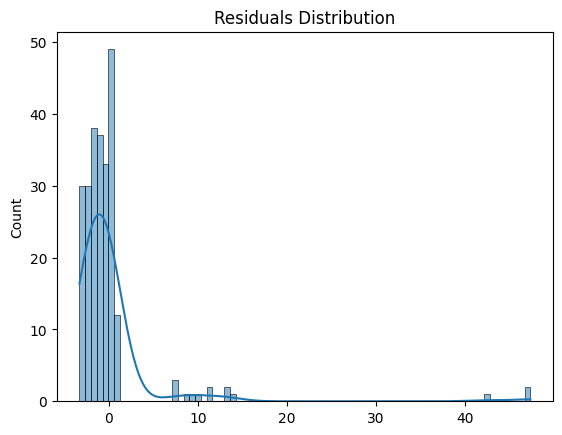

In [48]:
# Predictions
predictions = model.predict(X)

# Plot predicted vs actual
plt.scatter(y, predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Residual Plot
residuals = y - predictions
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()
